# <p style="text-align: center;">Findings about the Chicago PD ISR data set</p>
## <p style="text-align: center;">Geographics</p>
*&ast;ISR = Investigatory Stop Report*

***Background:*** In August of 2015, the Chicago PD reached an agreement to reform the practice of investigatory stops known as "stop and frisk". The City agreed to take steps to ensure that CPD policies and practices comply with the Fourth Amendment and the Illinois Civil Rights Act, which requires that government policies do not have a racially disparate impact.

This is the 5th years since the agreement, and during this year we have seen many tragedies involving the law enforcement. I believe it is a proper time to examine the current practice of "stop and frisk" in Chicago from a data point of view, and to explore possible findings that may help policy-making and public safety.

The data set is 2018-2019 ISR data from CPD website.

In this first Notebook, I will demonstrate some basic findings regarding "stop and frisk" in different communities.

In [1]:
# Python 3.8.0
import io
import json
import random
import numpy as np
import pandas as pd
from functools import reduce

from IPython.display import Image

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

pd.options.display.max_columns = None

In [2]:
# Load Data
df_main = pd.read_csv('ISR-1-Jan-2018--31-Dec-2019-Juv-Redacted.csv',
                     dtype={'DISTRICT': str, 'BEAT': str})

D:\Python37.4\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (12,34,97,98,99,100,107,108,109,143,145,147) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
def zip_validate(s):
    try:
        return str(int(s))
    except ValueError:
        return '0'

df_main['ZIP_CD'] = df_main['ZIP_CD'].apply(zip_validate)

In [4]:
# Load GeoJson data
with open('Boundaries - ZIP Codes.geojson', 'r') as f:
    geodata_zip = json.load(f)

In [5]:
# Total
df_tn_z = df_main['ZIP_CD'].value_counts()
df_tn_z = pd.DataFrame(data=zip(df_tn_z.index, df_tn_z.values), columns=['zip', 'num_tot'])

In [6]:
# Gang and Drug
df_main_gang = df_main.dropna(subset=['GANG', 'NAME', 'FACTION_NAME'], how='all')
df_tn_g = df_main_gang['ZIP_CD'].value_counts()
df_tn_g = pd.DataFrame(data=zip(df_tn_g.index, df_tn_g.values), columns=['zip', 'num_gang'])
df_main_drug = df_main[(df_main['COCAINE_I'] == 'Y') | (df_main['HEROIN_I'] == 'Y') | (df_main['CANNABIS_I'] == 'Y') |
                       (df_main['OTHER_CON_SUB_I'] == 'Y') | (df_main['SEARCH_COCAINE_I'] == 'Y') | (df_main['SEARCH_HEROIN_I'] == 'Y') | 
                       (df_main['SEARCH_CANNABIS_I'] == 'Y') | (df_main['SEARCH_OTHER_CON_SUB_I'] == 'Y')]
df_tn_d = df_main_drug['ZIP_CD'].value_counts()
df_tn_d = pd.DataFrame(data=zip(df_tn_d.index, df_tn_d.values), columns=['zip', 'num_drug'])

In [7]:
# Innocent
df_main_innocnet = df_main[df_main['ENFORCEMENT_ACTION_TAKEN_I'] == 'N']
df_tn_i = df_main_innocnet['ZIP_CD'].value_counts()
df_tn_i = pd.DataFrame(data=zip(df_tn_i.index, df_tn_i.values), columns=['zip', 'num_innocent'])

In [8]:
df_zip = reduce(lambda x, y: pd.merge(x, y, on ='zip'), [df_tn_z, df_tn_g, df_tn_d, df_tn_i])

In [9]:
df_zip.columns

Index(['zip', 'num_tot', 'num_gang', 'num_drug', 'num_innocent'], dtype='object')

In [10]:
# Zip Total
fig = go.Figure(go.Choroplethmapbox(featureidkey='properties.zip',geojson=geodata_zip, locations=df_zip['zip'], z=df_zip['num_tot'],
                                    colorscale="reds", zmin=0, zmax=16000,
                                    marker_opacity=0.7, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9.1, mapbox_center = {"lat": 41.823832, "lon": -87.623177})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
img_bytes = fig.to_image(format="png")

### <p style="text-align: center;">Fig 1. Total Number of ISR of yr 2018-2019 by Zip Code</p>

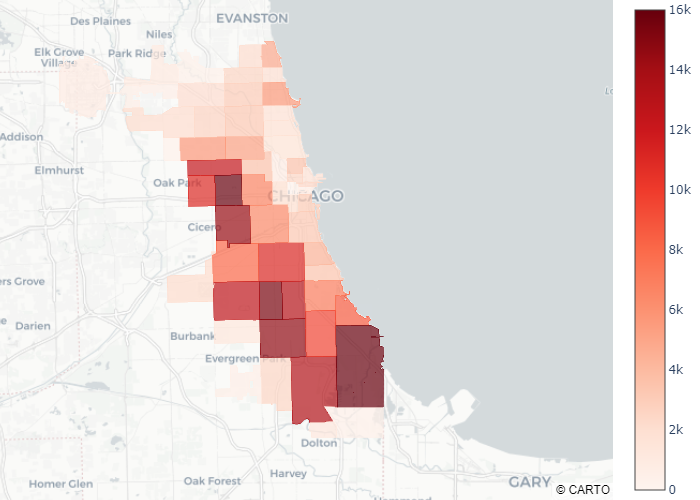

In [11]:
Image(img_bytes)

***Note:*** By looking at the total number, The West Side and South Side faces the highest number of ISR. Now we are going to look at possible motivations of officers enforcing "stop-and-frisk" more often in these communities.

In [12]:
# Gang-related stop
fig = go.Figure(go.Choroplethmapbox(featureidkey='properties.zip',geojson=geodata_zip, locations=df_zip['zip'], z=df_zip['num_gang'] / df_zip['num_tot'],
                                    colorscale="greys", zmin=0, zmax=0.3,
                                    marker_opacity=0.7, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9.1, mapbox_center = {"lat": 41.823832, "lon": -87.623177})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
img_bytes = fig.to_image(format="png")

### <p style="text-align: center;">Fig 2. Fraction of Gang-Related Stops by Zip Code</p>

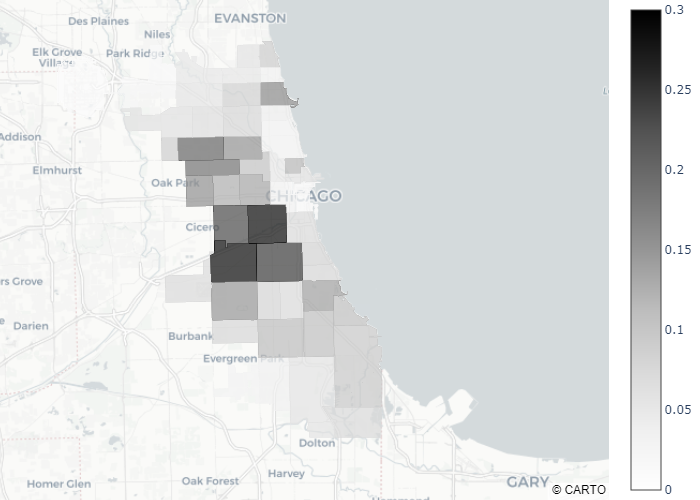

In [13]:
Image(img_bytes)

In [14]:
# Drug-related stop
fig = go.Figure(go.Choroplethmapbox(featureidkey='properties.zip',geojson=geodata_zip, locations=df_zip['zip'], z=df_zip['num_drug'] / df_zip['num_tot'],
                                    colorscale="greys", zmin=0, zmax=0.1,
                                    marker_opacity=0.7, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9.1, mapbox_center = {"lat": 41.823832, "lon": -87.623177})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
img_bytes = fig.to_image(format="png")

### <p style="text-align: center;">Fig 3. Fraction of Drug-Related Stops by Zip Code</p>

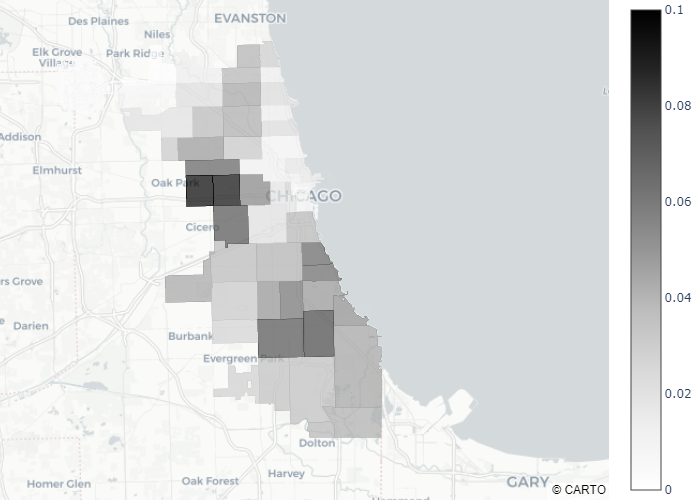

In [15]:
Image(img_bytes)

***Note:*** It seems there is certain correlation between the number of stops and the percentage of gang- or drug-related stops. However, this leaves many South Side communities with unexplained high number of stops.

In [16]:
# Unnecessary stop
fig = go.Figure(go.Choroplethmapbox(featureidkey='properties.zip',geojson=geodata_zip, locations=df_zip['zip'], z=df_zip['num_innocent'] / df_zip['num_tot'],
                                    colorscale="rdbu", zmin=0.33, zmax=0.9,
                                    marker_opacity=0.7, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9.1, mapbox_center = {"lat": 41.823832, "lon": -87.623177})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
img_bytes = fig.to_image(format="png")

### <p style="text-align: center;">Fig 4. Fraction of Unnecessary Stops by Zip Code</p>

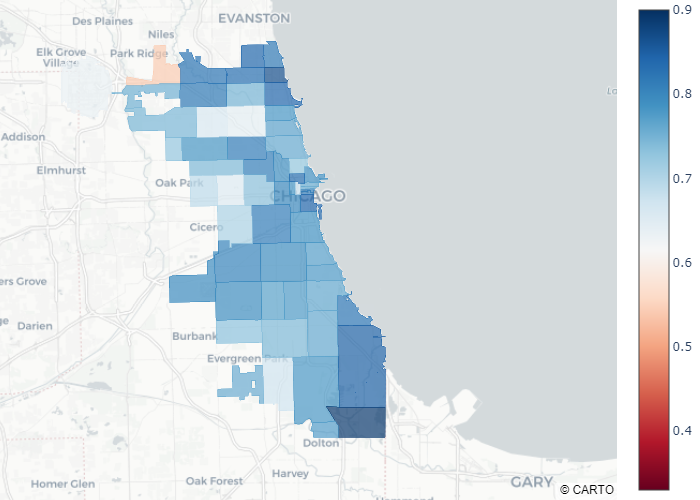

In [17]:
Image(img_bytes)

***Note:*** This plot shows the fraction of unnecessary stops - circumstances when a suspect is stopped but eventually no enforcement action was taken. While it is unreasonable to expect a police officer to catch a bad guy at every stop, the rate is still on the higher end. Also, it is interesting that the South Side communities have high ISR numbers (see Fig. 1) as well as high "innocent" rates.